Strategy

-> Since I will be working on a lip reading model from LIP NET RESEARCH PAPER and as per that research paper the video dont have sound and in every video speaker is speaking 5-7 words and the words are store in a diffrent file and not in correct format.

--> So 1st will load the dataset and check both video and alignment files together.

--> After that mapped every single video correctly with their respective alignment file

--> After that pre process the video data and then alignment data

--> Then we will use CNN + LSTM combined model as because working on a lip reading data where have to predict as per the video.
So, CNN will help us to extract the feature of the videos and while RNN will help us to predict the sequence ( using LSTM for sequence to sequence model building) and trowards the end compile both the model and do prediction **bold text**

**Installing the required Libraries**

In [1]:
!pip install remotezip tqdm opencv-python

In [2]:
!pip install -q git+https://github.com/tensorflow/docs

  Preparing metadata (setup.py) ... done


**Importing the required Libraries**

In [3]:
import tqdm
import random
import pathlib
import itertools
import collections

import os
import cv2
import numpy as np
import remotezip as rz
import seaborn as sns
import matplotlib.pyplot as plt

import tensorflow as tf

# Some modules to display an animation using imageio.
import imageio
from IPython import display
from urllib import request
from tensorflow_docs.vis import embed

In [4]:
tf.config.list_physical_devices('GPU')

[]

In [5]:
import gdown
import zipfile
from io import BytesIO

In [6]:
physical_devices = tf.config.list_physical_devices('GPU')
try:
    tf.config.experimental.set_memory_growth(physical_devices[0], True)
except:
    pass

**Building a lip reading model from LIP NET RESEARCH PAPER **


1.   Downloading the dataset - The dataset is in 2 form 1st data  is a video data and 2nd data is an alignment data which is in textual form.
2.   Dataset - Video data basically consists a short video of a person who is saying approx 5-7 words in each videos and alignment data consists the words that the person is saying in a video data



In [7]:
### Importing the required dataset

url = 'https://drive.google.com/uc?id=1YlvpDLix3S-U8fd-gqRwPcWXAXm8JwjL'
output = 'data.zip'
gdown.download(url, output, quiet=False)
gdown.extractall('data.zip')

Downloading...
From: https://drive.google.com/uc?id=1YlvpDLix3S-U8fd-gqRwPcWXAXm8JwjL
To: /content/data.zip
100%|██████████| 423M/423M [00:02<00:00, 165MB/s]


['data/',
 'data/alignments/',
 'data/alignments/s1/',
 'data/alignments/s1/bbaf2n.align',
 'data/alignments/s1/bbaf3s.align',
 'data/alignments/s1/bbaf4p.align',
 'data/alignments/s1/bbaf5a.align',
 'data/alignments/s1/bbal6n.align',
 'data/alignments/s1/bbal7s.align',
 'data/alignments/s1/bbal8p.align',
 'data/alignments/s1/bbal9a.align',
 'data/alignments/s1/bbas1s.align',
 'data/alignments/s1/bbas2p.align',
 'data/alignments/s1/bbas3a.align',
 'data/alignments/s1/bbaszn.align',
 'data/alignments/s1/bbaz4n.align',
 'data/alignments/s1/bbaz5s.align',
 'data/alignments/s1/bbaz6p.align',
 'data/alignments/s1/bbaz7a.align',
 'data/alignments/s1/bbbf6n.align',
 'data/alignments/s1/bbbf7s.align',
 'data/alignments/s1/bbbf8p.align',
 'data/alignments/s1/bbbf9a.align',
 'data/alignments/s1/bbbm1s.align',
 'data/alignments/s1/bbbm2p.align',
 'data/alignments/s1/bbbm3a.align',
 'data/alignments/s1/bbbmzn.align',
 'data/alignments/s1/bbbs4n.align',
 'data/alignments/s1/bbbs5s.align',
 'data/al

In [8]:
### Checking files in folders

alignments_files = "/content/data/alignments/s1"
video_files = "/content/data/s1"

**Reading alignment files with a specific format and extracts timing information along with labels**

In [9]:
### Checking alingment files details

from collections import defaultdict

alignment_details = defaultdict(list)

for filename in os.listdir(alignments_files):
    if filename.endswith(".align"):
        alignment_file_path = os.path.join(alignments_files, filename)


        with open(alignment_file_path, "r") as alignment_file:
            for line in alignment_file:
                parts = line.strip().split()
                if len(parts) == 3:
                    start_time = int(parts[0])
                    end_time = int(parts[1])
                    label = parts[2]
                    alignment_details[label].append((start_time, end_time))


In [10]:
### Checking the video count

total_video_files = 0
for filename in os.listdir(video_files):
    if filename.endswith(".mpg"):
        total_video_files += 1

In [11]:
### Checking the alignment file details

print("Alignment Details:")
for label, intervals in alignment_details.items():
    print(f"Label: {label}")
    print(f"Number of Intervals: {len(intervals)}")
    print(f"Intervals: {intervals}")
    print()

Alignment Details:
Label: sil
Number of Intervals: 2000
Intervals: [(0, 16000), (50000, 74500), (0, 18000), (64250, 74500), (0, 9500), (50750, 74500), (0, 23250), (58250, 74500), (0, 10250), (52000, 74500), (0, 19000), (56750, 74500), (0, 16000), (54500, 74500), (0, 10000), (49250, 74500), (0, 14500), (45000, 74500), (0, 13250), (54000, 74500), (0, 9500), (54500, 74500), (0, 14250), (50750, 74500), (0, 9500), (54250, 74500), (0, 16500), (49500, 74500), (0, 10500), (51000, 74500), (0, 8500), (51250, 74500), (0, 6250), (48500, 74500), (0, 17250), (54000, 74500), (0, 7750), (49750, 74500), (0, 12000), (48250, 74500), (0, 17500), (53000, 74500), (0, 13750), (52000, 74500), (0, 12000), (47250, 74500), (0, 17250), (45500, 74500), (0, 19500), (57000, 74500), (0, 20250), (56250, 74500), (0, 13250), (48250, 74500), (0, 13000), (46000, 74500), (0, 10500), (47250, 74500), (0, 7750), (49250, 74500), (0, 19000), (53500, 74500), (0, 16750), (56000, 74500), (0, 13250), (46750, 74500), (0, 21500), (57

In [12]:
print(f"Total Video Files: {total_video_files}")

Total Video Files: 1000


In [13]:
### Checking the count of alignment files

alignment_file_count = 0
for filename in os.listdir(alignments_files):
    if filename.endswith(".align"):
        alignment_file_count += 1

print(f"Total Alignment Files: {alignment_file_count}")

Total Alignment Files: 1000


In [14]:
### Converting both the files into list

alignment_files_list = [os.path.join(alignments_files, filename) for filename in os.listdir(alignments_files)]
video_files_list = [os.path.join(video_files, filename) for filename in os.listdir(video_files)]


**As video and alignment file are not in a same and proper structure both the files stored completely in a opposite direction, so converting files first into list and then sorting every file as per their name for further pre processing**

In [15]:
### Removing the crroupted file whihc is causing the issue in mapping

video_files_list = [video_path for video_path in video_files_list if not video_path.lower().endswith('thumbs.db')]
alignment_files_list = [alignment_path for alignment_path in alignment_files_list if not alignment_path.endswith('swwv9a.align')]

In [16]:
video_filenames = [os.path.basename(video_path) for video_path in video_files_list]
alignment_filenames = [os.path.basename(alignment_path) for alignment_path in alignment_files_list]

In [17]:
sorted_video_filenames = sorted(video_filenames)
sorted_alignment_filenames = sorted(alignment_filenames)

**Alligning both the files so that model able to train with the correct allignment files**

In [18]:
video_alignment_mapping = []
for video_filename, alignment_filename in zip(sorted_video_filenames, sorted_alignment_filenames):
    video_alignment_mapping.append({
        'video_filename': video_filename,
        'alignment_filename': alignment_filename
    })


for mapping in video_alignment_mapping:
    print(mapping)

{'video_filename': 'bbaf2n.mpg', 'alignment_filename': 'bbaf2n.align'}
{'video_filename': 'bbaf3s.mpg', 'alignment_filename': 'bbaf3s.align'}
{'video_filename': 'bbaf4p.mpg', 'alignment_filename': 'bbaf4p.align'}
{'video_filename': 'bbaf5a.mpg', 'alignment_filename': 'bbaf5a.align'}
{'video_filename': 'bbal6n.mpg', 'alignment_filename': 'bbal6n.align'}
{'video_filename': 'bbal7s.mpg', 'alignment_filename': 'bbal7s.align'}
{'video_filename': 'bbal8p.mpg', 'alignment_filename': 'bbal8p.align'}
{'video_filename': 'bbal9a.mpg', 'alignment_filename': 'bbal9a.align'}
{'video_filename': 'bbas1s.mpg', 'alignment_filename': 'bbas1s.align'}
{'video_filename': 'bbas2p.mpg', 'alignment_filename': 'bbas2p.align'}
{'video_filename': 'bbas3a.mpg', 'alignment_filename': 'bbas3a.align'}
{'video_filename': 'bbaszn.mpg', 'alignment_filename': 'bbaszn.align'}
{'video_filename': 'bbaz4n.mpg', 'alignment_filename': 'bbaz4n.align'}
{'video_filename': 'bbaz5s.mpg', 'alignment_filename': 'bbaz5s.align'}
{'vide

**After alignment seprating the file for further preprocessing**

In [19]:
video_filenames = [item['video_filename'] for item in video_alignment_mapping]
alignment_filenames = [item['alignment_filename'] for item in video_alignment_mapping]


**Due to limited computational resource unable to process the large huge file so dropping approx 50% of the data so can work without any computational error**

In [20]:
num_video_files_to_keep = len(video_filenames) - 700
video_filenames = video_filenames[:num_video_files_to_keep]

num_alignment_files_to_keep = len(alignment_filenames) - 700
alignment_filenames = alignment_filenames[:num_alignment_files_to_keep]


In [21]:
print("Length of new video file", len(video_filenames))
print("Length of new alignment file", len(alignment_filenames))

Length of new video file 299
Length of new alignment file 299


**Defining function to get the exact lip region instead of focusing on the entire videos as its a lip reading model so will focus only on lip reading part**

In [22]:
def extract_lip_region_manual(frame):

    x, y, w, h = 150, 250, 150, 100
    lip_region = frame[y:y + h, x:x + w]
    return lip_region

In [23]:
import torch

**Converted every single frame into tensors and passed through the previously defined function**

In [24]:
full_video_paths = [os.path.join(video_files, filename) for filename in video_filenames]

In [25]:
full_alignment_paths = [os.path.join(alignments_files, filename) for filename in alignment_filenames]

**Creating every single videos into frames so with the help of frame can train the model accordingly **

In [26]:
preprocessed_lip_regions = []

for video_path in full_video_paths:
    cap = cv2.VideoCapture(video_path)
    video_frames = []

    while cap.isOpened():
        ret, frame = cap.read()
        if not ret:
            break

        lip_region = extract_lip_region_manual(frame)
        if lip_region is not None:
            gray_lip_region = cv2.cvtColor(lip_region, cv2.COLOR_BGR2GRAY)
            video_frames.append(gray_lip_region)

    cap.release()
    preprocessed_lip_regions.append(video_frames)
    print(f"Processed video: {video_path}, Total frames: {len(video_frames)}")


Processed video: /content/data/s1/bbaf2n.mpg, Total frames: 75
Processed video: /content/data/s1/bbaf3s.mpg, Total frames: 75
Processed video: /content/data/s1/bbaf4p.mpg, Total frames: 75
Processed video: /content/data/s1/bbaf5a.mpg, Total frames: 75
Processed video: /content/data/s1/bbal6n.mpg, Total frames: 75
Processed video: /content/data/s1/bbal7s.mpg, Total frames: 75
Processed video: /content/data/s1/bbal8p.mpg, Total frames: 75
Processed video: /content/data/s1/bbal9a.mpg, Total frames: 75
Processed video: /content/data/s1/bbas1s.mpg, Total frames: 75
Processed video: /content/data/s1/bbas2p.mpg, Total frames: 75
Processed video: /content/data/s1/bbas3a.mpg, Total frames: 75
Processed video: /content/data/s1/bbaszn.mpg, Total frames: 75
Processed video: /content/data/s1/bbaz4n.mpg, Total frames: 75
Processed video: /content/data/s1/bbaz5s.mpg, Total frames: 75
Processed video: /content/data/s1/bbaz6p.mpg, Total frames: 75
Processed video: /content/data/s1/bbaz7a.mpg, Total fra

In [27]:
### Creating tensors for every single video frames

video_frame_lists = [[] for _ in range(len(full_video_paths))]

for video_path, frames in zip(full_video_paths, preprocessed_lip_regions):
    video_index = full_video_paths.index(video_path)
    video_frame_lists[video_index].extend(frames)

video_frame_tensors = []

for frames in video_frame_lists:
    if frames:
        video_frame_tensors.append(torch.stack([torch.tensor(frame) for frame in frames]))

print("Total pre-processed video frames:", len(video_frame_tensors))

Total pre-processed video frames: 299


In [28]:
print(len(video_frame_tensors))

299


In [29]:
print(len(full_alignment_paths))

299


In [30]:
### Checking the every video file frame shape after converting it into tensors

for video_frames_list in video_frame_lists:
    for video_frames in video_frames_list:
        print("Video Frames Shape:", video_frames.shape)


Streaming output truncated to the last 5000 lines.
Video Frames Shape: (38, 150)
Video Frames Shape: (38, 150)
Video Frames Shape: (38, 150)
Video Frames Shape: (38, 150)
Video Frames Shape: (38, 150)
Video Frames Shape: (38, 150)
Video Frames Shape: (38, 150)
Video Frames Shape: (38, 150)
Video Frames Shape: (38, 150)
Video Frames Shape: (38, 150)
Video Frames Shape: (38, 150)
Video Frames Shape: (38, 150)
Video Frames Shape: (38, 150)
Video Frames Shape: (38, 150)
Video Frames Shape: (38, 150)
Video Frames Shape: (38, 150)
Video Frames Shape: (38, 150)
Video Frames Shape: (38, 150)
Video Frames Shape: (38, 150)
Video Frames Shape: (38, 150)
Video Frames Shape: (38, 150)
Video Frames Shape: (38, 150)
Video Frames Shape: (38, 150)
Video Frames Shape: (38, 150)
Video Frames Shape: (38, 150)
Video Frames Shape: (38, 150)
Video Frames Shape: (38, 150)
Video Frames Shape: (38, 150)
Video Frames Shape: (38, 150)
Video Frames Shape: (38, 150)
Video Frames Shape: (38, 150)
Video Frames Shape:

**Now Dealing with alignments file**

In [31]:
### Checking the 1st alignment file data

alignment_file_path = full_alignment_paths[0]
with open(alignment_file_path, 'r') as file:
    alignment_content = file.read()

print(alignment_content)


0 23750 sil
23750 29500 bin
29500 34000 blue
34000 35500 at
35500 41000 f
41000 47250 two
47250 53000 now
53000 74500 sil



In [32]:
### Tokenizing every words in alignment file for further pre processing

def tokenize_alignment(alignment_content):
    tokenized_alignment = []
    lines = alignment_content.strip().split('\n')

    for line in lines:
        start_time, end_time, word = line.split()
        tokenized_alignment.append({
            'start_time': int(start_time),
            'end_time': int(end_time),
            'word': word
        })

    return tokenized_alignment

In [33]:
### Creating tensors for every single alignment files

alignment_tensors = []

for alignment_file_path in full_alignment_paths:
    if alignment_file_path.lower().endswith(".align"):
        with open(alignment_file_path, 'r') as alignment_file:
            alignment_content = alignment_file.read()

        tokenized_alignment = tokenize_alignment(alignment_content)
        alignment_array = np.array(tokenized_alignment, dtype=object)
        alignment_tensors.append(alignment_array)

alignment_tensors = np.array(alignment_tensors, dtype=object)
print("Total alignment tensors:", len(alignment_tensors))


Total alignment tensors: 299


**Converting alignments files data into tensors**

In [34]:
print(len(alignment_tensors))

299


In [35]:
for alignment_item in alignment_tensors:
    print("Alignment Item Shape:", alignment_item.shape)


Alignment Item Shape: (8,)
Alignment Item Shape: (8,)
Alignment Item Shape: (8,)
Alignment Item Shape: (8,)
Alignment Item Shape: (8,)
Alignment Item Shape: (8,)
Alignment Item Shape: (8,)
Alignment Item Shape: (8,)
Alignment Item Shape: (8,)
Alignment Item Shape: (8,)
Alignment Item Shape: (8,)
Alignment Item Shape: (8,)
Alignment Item Shape: (8,)
Alignment Item Shape: (8,)
Alignment Item Shape: (8,)
Alignment Item Shape: (8,)
Alignment Item Shape: (8,)
Alignment Item Shape: (8,)
Alignment Item Shape: (8,)
Alignment Item Shape: (8,)
Alignment Item Shape: (8,)
Alignment Item Shape: (8,)
Alignment Item Shape: (8,)
Alignment Item Shape: (8,)
Alignment Item Shape: (8,)
Alignment Item Shape: (8,)
Alignment Item Shape: (8,)
Alignment Item Shape: (8,)
Alignment Item Shape: (8,)
Alignment Item Shape: (8,)
Alignment Item Shape: (8,)
Alignment Item Shape: (8,)
Alignment Item Shape: (8,)
Alignment Item Shape: (8,)
Alignment Item Shape: (8,)
Alignment Item Shape: (8,)
Alignment Item Shape: (8,)
A

**Mapping Video tensors frames & alignment tensors with each other, mapping every video frames with every alignment accordingly**

In [36]:
mapped_data = []

for video_tensor, alignment_dict in zip(video_frame_tensors, alignment_tensors):
    alignment_start_times = [entry['start_time'] for entry in alignment_dict]
    alignment_end_times = [entry['end_time'] for entry in alignment_dict]

    mapped_data.append({
        'video_tensor': video_tensor,
        'alignment_start_times': alignment_start_times,
        'alignment_end_times': alignment_end_times
    })

print("Total video and alignment pairs:", len(mapped_data))


Total video and alignment pairs: 299


In [37]:
mapped_data

[{'video_tensor': tensor([[[116, 114, 109,  ..., 104, 104, 104],
           [113, 110, 104,  ..., 104, 104, 104],
           [110, 109, 103,  ..., 104, 104, 104],
           ...,
           [144, 144, 145,  ...,  99,  93,  90],
           [145, 145, 145,  ..., 109,  96,  90],
           [145, 145, 143,  ..., 117, 101,  92]],
  
          [[115, 113, 107,  ..., 103, 103, 103],
           [111, 109, 102,  ..., 103, 103, 103],
           [110, 109, 103,  ..., 103, 103, 103],
           ...,
           [144, 143, 145,  ...,  94,  89,  89],
           [145, 144, 145,  ..., 107,  94,  89],
           [146, 145, 143,  ..., 121, 102,  92]],
  
          [[114, 111, 106,  ..., 104, 104, 104],
           [110, 108, 102,  ..., 104, 104, 104],
           [109, 108, 100,  ..., 104, 104, 104],
           ...,
           [144, 143, 144,  ...,  92,  89,  90],
           [145, 144, 144,  ..., 102,  90,  90],
           [146, 145, 144,  ..., 117,  96,  90]],
  
          ...,
  
          [[116, 116, 11

**Reshaping the mapped data**

In [38]:
for data_dict in mapped_data:
    video_tensor = data_dict['video_tensor']
    reshaped_video_tensor = video_tensor.view(video_tensor.size(1), video_tensor.size(2), video_tensor.size(0))
    data_dict['video_tensor'] = reshaped_video_tensor

In [39]:
reshaped_video_tensor

tensor([[[111, 110, 107,  ..., 102,  99,  99],
         [ 97,  96,  95,  ..., 104, 104, 104],
         [107, 106, 102,  ..., 101, 100,  99],
         ...,
         [106,  87,  85,  ...,  95,  94, 107],
         [144, 143, 137,  ..., 100, 117, 110],
         [110,  88,  84,  ..., 102, 107,  97]],

        [[145, 144, 138,  ...,  92, 116, 106],
         [115,  92,  86,  ...,  84, 113, 113],
         [110, 106, 107,  ..., 107, 102,  98],
         ...,
         [100,  88,  88,  ...,  85,  79, 116],
         [142, 142, 135,  ..., 102, 114, 120],
         [106,  86,  82,  ...,  96,  89, 104]],

        [[144, 143, 136,  ..., 102, 123, 109],
         [110,  87,  82,  ..., 106, 107,  99],
         [145, 144, 139,  ...,  94, 117, 104],
         ...,
         [ 93,  90,  91,  ...,  73,  67,  96],
         [142, 141, 135,  ..., 100, 109, 122],
         [100,  89,  87,  ...,  86,  75, 115]],

        ...,

        [[113, 110, 108,  ...,  97,  96,  98],
         [ 95,  92,  94,  ..., 104, 104, 104]

In [40]:
print(reshaped_video_tensor.shape)


torch.Size([38, 150, 75])


In [41]:
### Spliting the data

from sklearn.model_selection import train_test_split

In [42]:
### Reshaping the video tensor file

reshaped_video_tensors_numpy = np.array([tensor.numpy() for tensor in reshaped_video_tensor])

In [43]:
num_train_samples = len(reshaped_video_tensors_numpy)
train_alignment = np.random.randint(0, 2, size=num_train_samples)

In [44]:
### Spliting the data into train test split

train_video, test_video, train_alignment, test_alignment = train_test_split(
    reshaped_video_tensors_numpy, train_alignment, test_size=0.2, random_state=42
)


In [45]:
### Checking the shape and length of training and testing data

print("Shape of train_video:", train_video.shape)
print("Shape of test_video:", test_video.shape)
print("Number of labels in train_alignment:", len(train_alignment))
print("Number of labels in test_alignment:", len(test_alignment))


Shape of train_video: (30, 150, 75)
Shape of test_video: (8, 150, 75)
Number of labels in train_alignment: 30
Number of labels in test_alignment: 8


## **Using CNN + RNN Architecture as goal is to produced sequence to sequence modl,, so using CNN to extract the features and RNN to produce the sequence **

In [46]:
### Importing required libraries

from keras.models import Model
from keras.layers import Conv2D, MaxPooling2D, Flatten, LSTM, Dense, Input, Concatenate,Conv3D,MaxPooling3D,TimeDistributed

In [48]:
### Defining CNN architutre for feature extraction

cnn_input = Input(shape=(150, 75, 1))
cnn_features = Conv2D(filters=32, kernel_size=(3, 3), activation='relu')(cnn_input)
cnn_features = MaxPooling2D(pool_size=(2, 2))(cnn_features)
cnn_features = Flatten()(cnn_features)
cnn_model = Model(inputs=cnn_input, outputs=cnn_features)


In [49]:
### CNN Model summary

cnn_model.summary()

Model: "model"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_1 (InputLayer)        [(None, 150, 75, 1)]      0         
                                                                 
 conv2d (Conv2D)             (None, 148, 73, 32)       320       
                                                                 
 max_pooling2d (MaxPooling2D  (None, 74, 36, 32)       0         
 )                                                               
                                                                 
 flatten (Flatten)           (None, 85248)             0         
                                                                 
Total params: 320
Trainable params: 320
Non-trainable params: 0
_________________________________________________________________


**Taking CNN output as RNN input**

In [51]:
### Defining RNN model(LSTM) for sequence to sequence steps

lstm_input = Input(shape=(150, cnn_features.shape[-1]))
lstm_sequence = LSTM(units=64, return_sequences=True)(lstm_input)
lstm_model = Model(inputs=lstm_input, outputs=lstm_sequence)

In [52]:
### LSTM model summary

lstm_model.summary()

Model: "model_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_3 (InputLayer)        [(None, 150, 85248)]      0         
                                                                 
 lstm_1 (LSTM)               (None, 150, 64)           21840128  
                                                                 
Total params: 21,840,128
Trainable params: 21,840,128
Non-trainable params: 0
_________________________________________________________________


In [53]:
### Combining CNN & LSTM model together
from keras.layers import Reshape,RepeatVector

combined_input = cnn_input
cnn_output = cnn_model(combined_input)



repeated_cnn_output = RepeatVector(150)(cnn_output)
lstm_output = lstm_model(repeated_cnn_output)

In [56]:
combined_model = Model(inputs=cnn_input, outputs=lstm_output)
combined_model.compile(optimizer='adam', loss='mean_squared_error')

In [57]:
combined_model.compile(optimizer='adam', loss='mean_squared_error')


In [58]:
### Combined and final model summary

combined_model.summary()

Model: "model_3"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_1 (InputLayer)        [(None, 150, 75, 1)]      0         
                                                                 
 model (Functional)          (None, 85248)             320       
                                                                 
 repeat_vector (RepeatVector  (None, 150, 85248)       0         
 )                                                               
                                                                 
 model_2 (Functional)        (None, 150, 64)           21840128  
                                                                 
Total params: 21,840,448
Trainable params: 21,840,448
Non-trainable params: 0
_________________________________________________________________


In [60]:
### Was getting shape error, so reshapping the train & test alignment data data as per the input and output of the model

import numpy as np

train_alignment_reshaped = np.repeat(train_alignment[:, np.newaxis], 150, axis=1)
train_alignment_reshaped = train_alignment_reshaped[:, :, np.newaxis]

test_alignment_reshaped = np.repeat(test_alignment[:, np.newaxis], 150, axis=1)
test_alignment_reshaped = test_alignment_reshaped[:, :, np.newaxis]

print("Shape of train_alignment_reshaped:", train_alignment_reshaped.shape)
print("Shape of test_alignment_reshaped:", test_alignment_reshaped.shape)


Shape of train_alignment_reshaped: (30, 150, 1)
Shape of test_alignment_reshaped: (8, 150, 1)


In [63]:
### Again reshapping the train & Test video data because was getting error


train_video_reshaped = train_video.reshape(train_video.shape[0], train_video.shape[1], train_video.shape[2], 1)
test_video_reshaped = test_video.reshape(test_video.shape[0], test_video.shape[1], test_video.shape[2], 1)

print("Shape of train_video_reshaped:", train_video_reshaped.shape)
print("Shape of test_video_reshaped:", test_video_reshaped.shape)


Shape of train_video_reshaped: (30, 150, 75, 1)
Shape of test_video_reshaped: (8, 150, 75, 1)


In [64]:
### Clear previous stored model for any intersection with traning

tf.keras.backend.clear_session()


In [65]:
### Traning the model

tf.keras.backend.clear_session()

combined_model = Model(inputs=cnn_input, outputs=lstm_output)
combined_model.compile(optimizer='adam', loss='mean_squared_error')

combined_model.fit(train_video_reshaped, train_alignment_reshaped, epochs=10, batch_size=32, validation_data=(test_video_reshaped, test_alignment_reshaped))


Epoch 1/10
1/1 [==============================] - 29s 29s/step - loss: 0.7273 - val_loss: 0.5594
Epoch 2/10
1/1 [==============================] - 22s 22s/step - loss: 0.5005 - val_loss: 0.5594
Epoch 3/10
1/1 [==============================] - 22s 22s/step - loss: 0.5005 - val_loss: 0.5594
Epoch 4/10
1/1 [==============================] - 22s 22s/step - loss: 0.5001 - val_loss: 0.5594
Epoch 5/10
1/1 [==============================] - 23s 23s/step - loss: 0.5026 - val_loss: 0.5594
Epoch 6/10
1/1 [==============================] - 20s 20s/step - loss: 0.5026 - val_loss: 0.5594
Epoch 7/10
1/1 [==============================] - 21s 21s/step - loss: 0.5026 - val_loss: 0.5594
Epoch 8/10
1/1 [==============================] - 20s 20s/step - loss: 0.5026 - val_loss: 0.5594
Epoch 9/10
1/1 [==============================] - 21s 21s/step - loss: 0.5026 - val_loss: 0.5594
Epoch 10/10
1/1 [==============================] - 21s 21s/step - loss: 0.5026 - val_loss: 0.5594


In [69]:
### Checking the model prediction

predicted_alignment = combined_model.predict(test_video_reshaped)

1/1 [==============================] - 2s 2s/step


In [70]:
predicted_alignment_reshaped = predicted_alignment.reshape(-1, predicted_alignment.shape[-1])

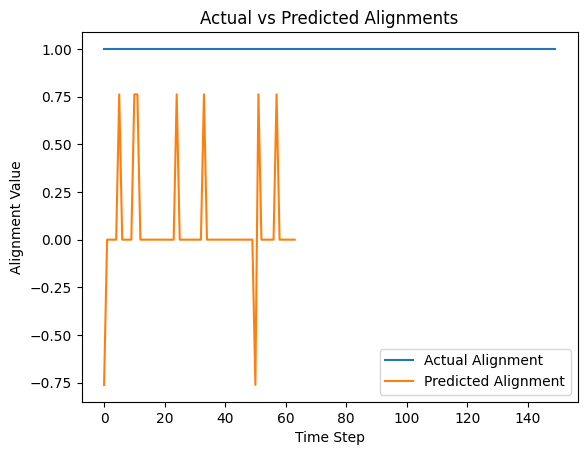

In [76]:
# Plotting actual and predicted alignments

plt.plot(test_alignment_reshaped[0], label='Actual Alignment')
plt.plot(predicted_alignment_reshaped[0], label='Predicted Alignment')
plt.xlabel('Time Step')
plt.ylabel('Alignment Value')
plt.title('Actual vs Predicted Alignments')
plt.legend()
plt.show()